<a href="https://colab.research.google.com/github/RohanRanjan501/-Computer-Vision-Histogram-Equalization/blob/master/housing_price_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing




In [4]:
data = pd.read_csv("/content/Q2_housing_data.csv")

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
data.shape

(20640, 10)

In [8]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [9]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
data['ocean_proximity'].value_counts()


<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Dividing the dataset into independant and dependant variables

In [15]:
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'],data=data)
y=pd.DataFrame(columns=['median_house_value'],data=data)

In [16]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [17]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


dummy values for ocean_proximity

In [18]:
X = pd.get_dummies(data = X, columns = ['ocean_proximity'] , prefix = ['ocean_proximity'] , drop_first = True)

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [20]:
hcorr = data.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


Dividing the training data into test and train

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape

(16346, 12)

Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 1.34433224, -1.36066295, -1.24306229, ..., -0.01564507,
        -0.35341954, -0.38540693],
       [-0.95712095,  1.38784294,  1.85169969, ..., -0.01564507,
        -0.35341954, -0.38540693],
       [ 0.9149939 , -0.71918883,  0.58205375, ..., -0.01564507,
        -0.35341954, -0.38540693],
       ...,
       [-1.34652084,  1.18650434, -0.44953358, ..., -0.01564507,
         2.8294983 , -0.38540693],
       [ 0.85009392, -0.88306908, -1.56047378, ..., -0.01564507,
        -0.35341954, -0.38540693],
       [ 2.03327051, -1.38407442, -0.37018071, ..., -0.01564507,
        -0.35341954, -0.38540693]])

In [25]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


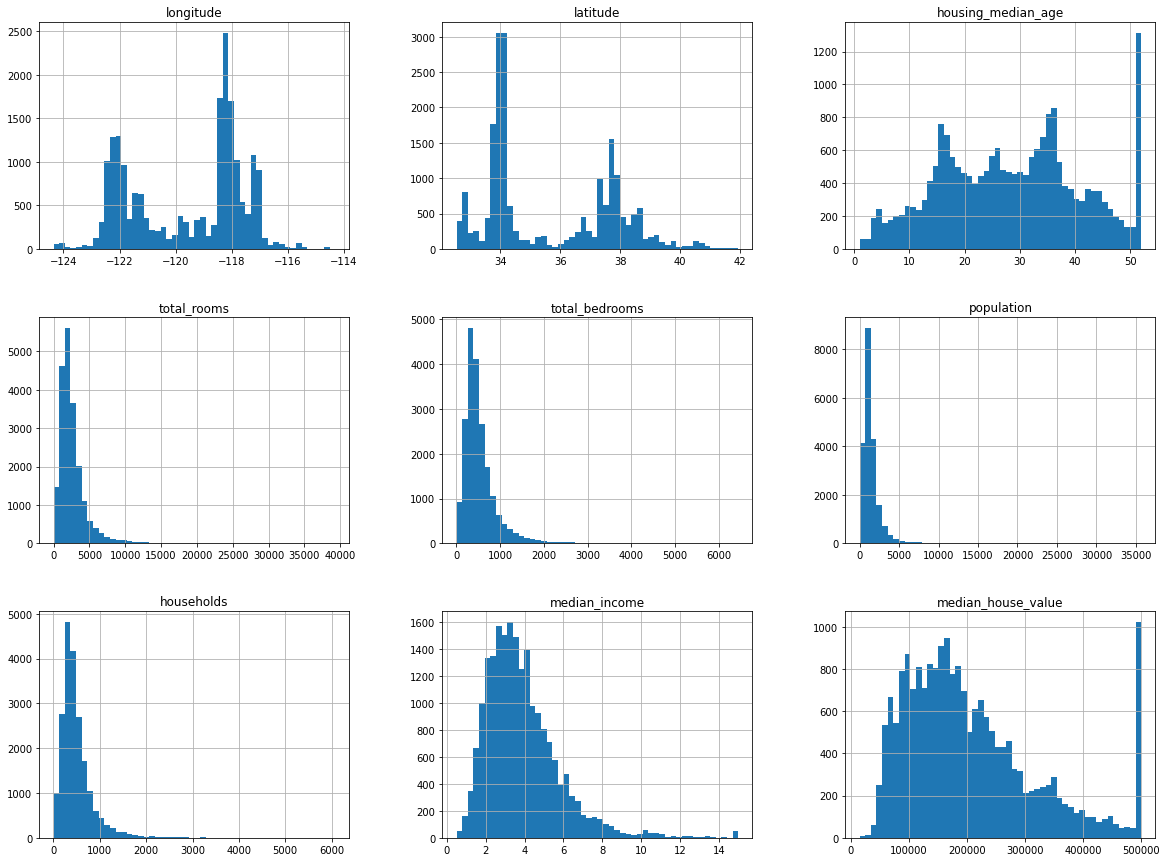

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

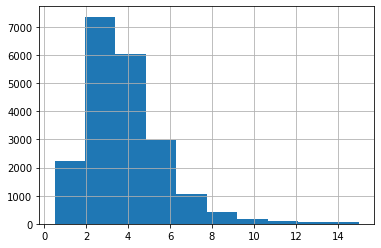

In [27]:
data['median_income'].hist()
plt.show()

ANN

In [28]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

In [29]:
model = Sequential()

#Input Layer
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))

#Hidden Layer
model.add(Dense(512,kernel_initializer='normal', activation='relu'))
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(64,kernel_initializer='normal', activation='relu'))
model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

In [30]:
X.shape[1]

12

In [31]:
#Compile the network 

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6656      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [32]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 64, epochs = 100, verbose = 1)

Epoch 1/100
256/256 [==============================] - 2s 6ms/step - loss: 24767293440.0000 - mse: 24767293440.0000 - mae: 116674.5703
Epoch 2/100
256/256 [==============================] - 1s 6ms/step - loss: 6737563136.0000 - mse: 6737563136.0000 - mae: 57451.8438
Epoch 3/100
256/256 [==============================] - 1s 6ms/step - loss: 5662114304.0000 - mse: 5662114304.0000 - mae: 53398.1602
Epoch 4/100
256/256 [==============================] - 1s 6ms/step - loss: 5190675456.0000 - mse: 5190675456.0000 - mae: 51338.9297
Epoch 5/100
256/256 [==============================] - 1s 6ms/step - loss: 4870627328.0000 - mse: 4870627328.0000 - mae: 49966.3008
Epoch 6/100
256/256 [==============================] - 1s 6ms/step - loss: 4676408832.0000 - mse: 4676408832.0000 - mae: 48862.4258
Epoch 7/100
256/256 [==============================] - 1s 5ms/step - loss: 4490825216.0000 - mse: 4490825216.0000 - mae: 47788.4023
Epoch 8/100
256/256 [==============================] - 1s 6ms/step - loss

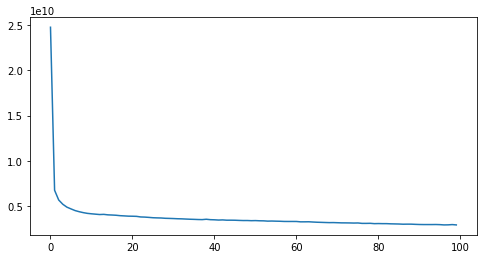

In [33]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])

In [34]:
model.save("HousingPrice.h5")

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([[123601.54],
       [187604.16],
       [121920.4 ],
       ...,
       [153272.94],
       [171694.95],
       [237102.67]], dtype=float32)

In [37]:
y_test

,median_house_value
14185,98900.0
6125,153000.0
14095,91300.0
14359,345200.0
18004,344100.0
...,...
19533,76300.0
7695,261600.0
15558,127000.0
16731,158600.0


In [38]:
model.evaluate(X_test, y_test)

128/128 [==============================] - 0s 2ms/step - loss: 3018250496.0000 - mse: 3018250496.0000 - mae: 38122.1914


[3018250496.0, 3018250496.0, 38122.19140625]

In [39]:
  def user_input():
    myList = []
    print("Enter longitude")
    myList.append(float(input()))
    print("\nEnter latitude")
    myList.append(float(input()))
    print("\nEnter housing_median_age")
    myList.append(float(input()))
    print("\nEnter total_rooms")
    myList.append(float(input()))
    print("\nEnter total_bedrooms")
    myList.append(float(input()))
    print("\nEnter population")
    myList.append(float(input()))
    print("\nEnter households")
    myList.append(float(input()))
    print("\nEnter median_income")
    myList.append(float(input()))
    print("\nOcean_proximity_INLAND")
    myList.append(int(input()))
    print("\nocean_proximity_ISLAND")
    myList.append(int(input()))
    print("\nocean_proximity_NEAR BAY")
    myList.append(int(input()))
    print("\nocean_proximity_NEAR OCEAN")
    myList.append(int(input()))
    x_user = np.array(myList)
    x_user = np.reshape(x_user, (1,-1))
    return x_user

x_user = user_input()
x_user = scaler.transform(x_user)
model.predict(x_user)

Enter longitude
-122.23

Enter latitude
37.88

Enter housing_median_age
41

Enter total_rooms
880

Enter total_bedrooms
129

Enter population
322

Enter households
126

Enter median_income
8.3252

Ocean_proximity_INLAND
0

ocean_proximity_ISLAND
0

ocean_proximity_NEAR BAY
1

ocean_proximity_NEAR OCEAN
0


array([[395915.25]], dtype=float32)

In [40]:
# -122.23  # 37.88 # 41 #  880 # 129 # 322 # 126 # 8.3252 # 452600 # 0 0 1 0  #